<a href="https://colab.research.google.com/github/nagelex/bhi/blob/main/substance_self_harm_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import of nessesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Correlation of self-Harm and Substance Abuse Deaths with GDP per capita in the Americas.
##1. Data preparation


original dataset:
[Self Harm and Substance Abuse Deaths Worldwide](https://www.kaggle.com/datasets/thomaseltonau/self-harm-and-substance-abuse-deaths-worldwide/code)

Supplementary Dataset: GDP by Country 1999-2022 ([Kaggle dataset](https://www.kaggle.com/code/alejopaullier/gdp-by-country-1999-2022))

Additional Population Data: [World Bank Population Dataset ](https://eur04.safelinks.protection.outlook.com/GetUrlReputation)

U.S. GDP Data: Federal Reserve Bank of St. Louis ([source](https://fred.stlouisfed.org/series/GDP))

For our analysis

 - we removed countries with incomplete GDP or population data (e.g., Anguilla, Bermuda).

- we removed unused demographic variables (Sex, Age_and_Sex_Population).

- we filtered to age group 20–29 and countries in the Americas.

- we excluded years 2020 and 2021 due to missing/erratic data; retained 2017 and 2019.

- we created binary flags for the presence of intentional self-harm and substance abuse deaths, where 1 = presence and 0 = absence.

In [ ]:
#import and show the table
data = pd.read_csv('/content/New_Dataset_Final_with_Population_and_GDPPerCapita.csv')
data.tail(20)

Year                                              Cause Age_Range  \
852  2020                              Intentional self-harm     20-24   
853  2020                              Intentional self-harm     25-29   
854  2020  Mental and behavioural disorders due to psycho...     20-24   
855  2020  Mental and behavioural disorders due to psycho...     25-29   
856  2017                              Intentional self-harm     20-24   
857  2017                              Intentional self-harm     25-29   
858  2017  Mental and behavioural disorders due to psycho...     20-24   
859  2017  Mental and behavioural disorders due to psycho...     25-29   
860  2018                              Intentional self-harm     20-24   
861  2018                              Intentional self-harm     25-29   
862  2018  Mental and behavioural disorders due to psycho...     20-24   
863  2018  Mental and behavioural disorders due to psycho...     25-29   
864  2019                              Intentional self-harm     20-24   
865  2019                              Intentional self-harm     25-29   
866  2019  Mental and behavioural disorders due to psycho...     20-24   
867  2019  Mental and behavioural disorders due to psycho...     25-29   
868  2020                              Intentional self-harm     20-24   
869  2020                              Intentional self-harm     25-29   
870  2020  Mental and behavioural disorders due to psycho...     20-24   
871  2020  Mental and behavioural disorders due to psycho...     25-29   

    ISO_Code  Deaths                   Country  intentional_self_harm_flag  \
852      USA    3844  United States of America                           1   
853      USA    4198  United States of America                           1   
854      USA     142  United States of America                           0   
855      USA     522  United States of America                           0   
856      URY      71                   Uruguay                           1   
857      URY      56                   Uruguay                           1   
858      URY       0                   Uruguay                           0   
859      URY       1                   Uruguay                           0   
860      URY      63                   Uruguay                           1   
861      URY      49                   Uruguay                           1   
862      URY       2                   Uruguay                           0   
863      URY       1                   Uruguay                           0   
864      URY      77                   Uruguay                           1   
865      URY      75                   Uruguay                           1   
866      URY       1                   Uruguay                           0   
867      URY       1                   Uruguay                           0   
868      URY      75                   Uruguay                           1   
869      URY      76                   Uruguay                           1   
870      URY       0                   Uruguay                           0   
871      URY       2                   Uruguay                           0   

     substance_use_flag continent           GDP   Country.Name  Population  \
852                   0  Americas  2.135410e+13  United States   331526933   
853                   0  Americas  2.135410e+13  United States   331526933   
854                   1  Americas  2.135410e+13  United States   331526933   
855                   1  Americas  2.135410e+13  United States   331526933   
856                   0  Americas  5.994300e+10        Uruguay     3388438   
857                   0  Americas  5.994300e+10        Uruguay     3388438   
858                   1  Americas  5.994300e+10        Uruguay     3388438   
859                   1  Americas  5.994300e+10        Uruguay     3388438   
860                   0  Americas  6.313400e+10        Uruguay     3394534   
861                   0  Americ

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        872 non-null    int64  
 1   Cause                       872 non-null    object 
 2   Age_Range                   872 non-null    object 
 3   ISO_Code                    872 non-null    object 
 4   Deaths                      872 non-null    int64  
 5   Country                     872 non-null    object 
 6   intentional_self_harm_flag  872 non-null    int64  
 7   substance_use_flag          872 non-null    int64  
 8   continent                   872 non-null    object 
 9   GDP                         872 non-null    float64
 10  Country.Name                872 non-null    object 
 11  Population                  872 non-null    int64  
 12  gdp_per_capita              872 non-null    float64
dtypes: float64(2), int64(5), object(6)


In [ ]:
data.describe()

Year       Deaths  intentional_self_harm_flag  \
count   872.000000   872.000000                  872.000000   
mean   2018.383028   159.672018                    0.490826   
std       1.100083   520.278116                    0.500203   
min    2017.000000     0.000000                    0.000000   
25%    2017.000000     0.000000                    0.000000   
50%    2018.000000    12.000000                    0.000000   
75%    2019.000000    76.000000                    1.000000   
max    2020.000000  4198.000000                    1.000000   

       substance_use_flag           GDP    Population  gdp_per_capita  
count          872.000000  8.720000e+02  8.720000e+02      872.000000  
mean             0.509174  1.560000e+12  5.501158e+07    14049.727930  
std              0.500203  4.687841e+12  8.637210e+07    14797.049847  
min              0.000000  5.770000e+08  6.757300e+04     2196.246464  
25%              0.000000  5.095000e+10  5.034320e+06     6251.551730  
50%              1.000000  1.084680e+11  1.734002e+07     9568.633643  
75%              1.000000  6.338890e+11  4.519196e+07    14026.586363  
max              1.000000  2.153998e+13  3.315269e+08    65604.681520

In [ ]:
data['Country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Dominica', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'United States of America', 'Uruguay'], dtype=object)

In [ ]:
na_gdp_countries = data[data['GDP'].isna()]['Country'].unique()
na_gdp_countries

array([], dtype=object)

In [ ]:
array = ['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bermuda',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Grenada', 'Guatemala', 'Guyana', 'Mexico', 'Nicaragua', 'Panama',
       'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia',
       'Saint Vincent and Grenadines', 'Turks and Caicos Islands',
       'United States of America', 'Uruguay']

In [ ]:
!pip install ydata-profiling
!pip install --upgrade typing-extensions

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=949de704b86e8f4bb0435fa0dcce0e4f8d0b6c54b29001e1b8736ae6a3facc46
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
#EDA
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:


profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 21.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from google.colab import files

#export of EDA
profile.to_file("EDA.html")
files.download("EDA.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.columns

Index(['Year', 'Cause', 'Age_Range', 'ISO_Code', 'Deaths', 'Country',
       'intentional_self_harm_flag', 'substance_use_flag', 'continent', 'GDP',
       'Country.Name', 'Population', 'gdp_per_capita'],
      dtype='object')

Ananlisis is ocn

In [ ]:
aggregated_data = pd.DataFrame()

for year in [2017, 2019]:

    data_year = data[data['Year'] == year]

    # sum of deaths for each of reasons
    intentional_self_harm_deaths = data_year[data_year['intentional_self_harm_flag'] == 1].groupby('Country')['Deaths'].sum()
    substance_use_deaths = data_year[data_year['substance_use_flag'] == 1].groupby('Country')['Deaths'].sum()

    # population is transfered from the first occurance
    population = data_year.groupby('Country')['Population'].first()

    # columns  for 2017 and 2019
    intentional_self_harm_col_name = f'Intentional Self Harm Deaths {year}'
    substance_use_col_name = f'Substance Use Deaths {year}'
    population_col_name = f'Population {year}'

    temp_df = pd.concat([intentional_self_harm_deaths, substance_use_deaths, population], axis=1,
                        keys=[intentional_self_harm_col_name, substance_use_col_name, population_col_name])
    temp_df.reset_index(inplace=True)

    # merging into the dataset
    if aggregated_data.empty:
        aggregated_data = temp_df
    else:
        aggregated_data = pd.merge(aggregated_data, temp_df, on='Country', how='outer')

aggregated_data


Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
8         Dominican Republic                              230.0   
9                    Ecuador                              688.0   
10               El Salvador                              114.0   
11                   Grenada                                0.0   
12                 Guatemala                              408.0   
13                    Guyana                              102.0   
14                    Mexico                             3754.0   
15                 Nicaragua                              228.0   
16                    Panama                               50.0   
17                  Paraguay                              216.0   
18                      Peru                              222.0   
19  United States of America                            15630.0   
20                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
8                         0.0         10666843   
9                         8.0         16759519   
10                       78.0          6213533   
11                        0.0           115438   
12                       78.0         16567357   
13                        0.0           768479   
14                      264.0        123400057   
15                       28.0          6316231   
16                        2.0          4098707   
17                        6.0          6338660   
18                        6.0         31324637   
19                     1152.0        325122128   
20                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
8                                 NaN                        NaN   
9                               688.0                       12.0   
10                                NaN                        NaN   
11                                NaN                        0.0   
12                              394.0                       98.0   
13                               74.0                        0.0   
14                             4226.0                      256.0   
15                              226.0                       16.0   
16                               42.0                        0.0   
17                              304.0                        6.0   
18                              268.0                        2.0   
19                            15542.0                     1016.0   
20               

In [ ]:
aggregated_data = aggregated_data[~aggregated_data['Country'].isin(['Dominican Republic', 'El Salvador'])]


In [ ]:
aggregated_data

Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
9                    Ecuador                              688.0   
11                   Grenada                                0.0   
12                 Guatemala                              408.0   
13                    Guyana                              102.0   
14                    Mexico                             3754.0   
15                 Nicaragua                              228.0   
16                    Panama                               50.0   
17                  Paraguay                              216.0   
18                      Peru                              222.0   
19  United States of America                            15630.0   
20                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
9                         8.0         16759519   
11                        0.0           115438   
12                       78.0         16567357   
13                        0.0           768479   
14                      264.0        123400057   
15                       28.0          6316231   
16                        2.0          4098707   
17                        6.0          6338660   
18                        6.0         31324637   
19                     1152.0        325122128   
20                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
9                               688.0                       12.0   
11                                NaN                        0.0   
12                              394.0                       98.0   
13                               74.0                        0.0   
14                             4226.0                      256.0   
15                              226.0                       16.0   
16                               42.0                        0.0   
17                              304.0                        6.0   
18                              268.0                        2.0   
19                            15542.0                     1016.0   
20                              304.0                        4.0   

    Population 2019  
0           91364.0  
1        44973465.0  
2       207455459.0  
3        37618495.0  
4        19197744.0  
5        49907985.0  
6         4999553.0  
7           67880.0  
9        17340021.0  
11         115981.0  
12       17103803.0  
13         807665.0  
14      125762982.0  
15        

In [ ]:
aggregated_data['Deaths_2017_intentional_self_harm_adjusted'] = aggregated_data['Intentional Self Harm Deaths 2017']/aggregated_data['Population 2017']
aggregated_data['Deaths_2017_substance_use_adjusted'] = aggregated_data['Substance Use Deaths 2017']/aggregated_data['Population 2017']
aggregated_data['Deaths_2019_intentional_self_harm_adjusted'] = aggregated_data['Intentional Self Harm Deaths 2019']/aggregated_data['Population 2019']
aggregated_data['Deaths_2019_substance_use_adjusted'] = aggregated_data['Substance Use Deaths 2019']/aggregated_data['Population 2019']

In [ ]:
aggregated_data

Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
9                    Ecuador                              688.0   
11                   Grenada                                0.0   
12                 Guatemala                              408.0   
13                    Guyana                              102.0   
14                    Mexico                             3754.0   
15                 Nicaragua                              228.0   
16                    Panama                               50.0   
17                  Paraguay                              216.0   
18                      Peru                              222.0   
19  United States of America                            15630.0   
20                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
9                         8.0         16759519   
11                        0.0           115438   
12                       78.0         16567357   
13                        0.0           768479   
14                      264.0        123400057   
15                       28.0          6316231   
16                        2.0          4098707   
17                        6.0          6338660   
18                        6.0         31324637   
19                     1152.0        325122128   
20                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
9                               688.0                       12.0   
11                                NaN                        0.0   
12                              394.0                       98.0   
13                               74.0                        0.0   
14                             4226.0                      256.0   
15                              226.0                       16.0   
16                               42.0                        0.0   
17                              304.0                        6.0   
18                              268.0                        2.0   
19                            15542.0                     1016.0   
20                              304.0                        4.0   

    Population 2019  Deaths_2017_intentional_self_harm_adjusted  \
0           91364.0                                         NaN   
1        44973465.0                                    0.000038   
2       207455459.0                                    0.000023   
3        37618495.0                               

In [ ]:
# create a new DataFrame to store the aggregated data with GDP per capita
aggregated_data_with_gdp = pd.DataFrame()

for year in [2017, 2019]:
  data_year = data[data['Year'] == year]

  gdp_per_capita_by_country = data_year.groupby('Country')['gdp_per_capita'].mean()

  gdp_per_capita_col_name = f'GDP_per_capita_{year}'


  if aggregated_data_with_gdp.empty:
      aggregated_data_with_gdp = pd.DataFrame({
          'Country': gdp_per_capita_by_country.index,
          gdp_per_capita_col_name: gdp_per_capita_by_country.values
      })
  else:
      aggregated_data_with_gdp = pd.merge(aggregated_data_with_gdp, pd.DataFrame({
          'Country': gdp_per_capita_by_country.index,
          gdp_per_capita_col_name: gdp_per_capita_by_country.values
      }), on='Country', how='outer')

# merge the aggregated data with GDP per capita with the existing aggregated data
final_aggregated_data = pd.merge(aggregated_data, aggregated_data_with_gdp, on='Country', how='left')

# Print the final aggregated data
final_aggregated_data


Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
8                    Ecuador                              688.0   
9                    Grenada                                0.0   
10                 Guatemala                              408.0   
11                    Guyana                              102.0   
12                    Mexico                             3754.0   
13                 Nicaragua                              228.0   
14                    Panama                               50.0   
15                  Paraguay                              216.0   
16                      Peru                              222.0   
17  United States of America                            15630.0   
18                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
8                         8.0         16759519   
9                         0.0           115438   
10                       78.0         16567357   
11                        0.0           768479   
12                      264.0        123400057   
13                       28.0          6316231   
14                        2.0          4098707   
15                        6.0          6338660   
16                        6.0         31324637   
17                     1152.0        325122128   
18                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
8                               688.0                       12.0   
9                                 NaN                        0.0   
10                              394.0                       98.0   
11                               74.0                        0.0   
12                             4226.0                      256.0   
13                              226.0                       16.0   
14                               42.0                        0.0   
15                              304.0                        6.0   
16                              268.0                        2.0   
17                            15542.0                     1016.0   
18                              304.0                        4.0   

    Population 2019  Deaths_2017_intentional_self_harm_adjusted  \
0           91364.0                                         NaN   
1        44973465.0                                    0.000038   
2       207455459.0                                    0.000023   
3        37618495.0                               

In [ ]:
#for the agregated data set add iso_codes for each present country from initial dataset

!pip install pycountry

import pycountry

def get_iso_code(country_name):
  try:
    country = pycountry.countries.get(name=country_name)
    if country:
      return country.alpha_3
    else:
      return None
  except:
    return None

# Apply the function to the 'Country' column and create a new 'ISO_Code' column
final_aggregated_data['ISO_Code'] = final_aggregated_data['Country'].apply(get_iso_code)

# Print the updated DataFrame
final_aggregated_data


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.4 MB/s eta 0:00:00


Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
8                    Ecuador                              688.0   
9                    Grenada                                0.0   
10                 Guatemala                              408.0   
11                    Guyana                              102.0   
12                    Mexico                             3754.0   
13                 Nicaragua                              228.0   
14                    Panama                               50.0   
15                  Paraguay                              216.0   
16                      Peru                              222.0   
17  United States of America                            15630.0   
18                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
8                         8.0         16759519   
9                         0.0           115438   
10                       78.0         16567357   
11                        0.0           768479   
12                      264.0        123400057   
13                       28.0          6316231   
14                        2.0          4098707   
15                        6.0          6338660   
16                        6.0         31324637   
17                     1152.0        325122128   
18                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
8                               688.0                       12.0   
9                                 NaN                        0.0   
10                              394.0                       98.0   
11                               74.0                        0.0   
12                             4226.0                      256.0   
13                              226.0                       16.0   
14                               42.0                        0.0   
15                              304.0                        6.0   
16                              268.0                        2.0   
17                            15542.0                     1016.0   
18                              304.0                        4.0   

    Population 2019  Deaths_2017_intentional_self_harm_adjusted  \
0           91364.0                                         NaN   
1        44973465.0                                    0.000038   
2       207455459.0                                    0.000023   
3        37618495.0                               

In [ ]:
#manual addition of USA

def get_iso_code(country_name):
  try:
    if country_name == "United States of America":
      return "USA"
    country = pycountry.countries.get(name=country_name)
    if country:
      return country.alpha_3
    else:
      return None
  except:
    return None

final_aggregated_data['ISO_Code'] = final_aggregated_data['Country'].apply(get_iso_code)


final_aggregated_data


Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
8                    Ecuador                              688.0   
9                    Grenada                                0.0   
10                 Guatemala                              408.0   
11                    Guyana                              102.0   
12                    Mexico                             3754.0   
13                 Nicaragua                              228.0   
14                    Panama                               50.0   
15                  Paraguay                              216.0   
16                      Peru                              222.0   
17  United States of America                            15630.0   
18                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
8                         8.0         16759519   
9                         0.0           115438   
10                       78.0         16567357   
11                        0.0           768479   
12                      264.0        123400057   
13                       28.0          6316231   
14                        2.0          4098707   
15                        6.0          6338660   
16                        6.0         31324637   
17                     1152.0        325122128   
18                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
8                               688.0                       12.0   
9                                 NaN                        0.0   
10                              394.0                       98.0   
11                               74.0                        0.0   
12                             4226.0                      256.0   
13                              226.0                       16.0   
14                               42.0                        0.0   
15                              304.0                        6.0   
16                              268.0                        2.0   
17                            15542.0                     1016.0   
18                              304.0                        4.0   

    Population 2019  Deaths_2017_intentional_self_harm_adjusted  \
0           91364.0                                         NaN   
1        44973465.0                                    0.000038   
2       207455459.0                                    0.000023   
3        37618495.0                               

In [ ]:
# total deaths count
total_substance_use_deaths_2017 = aggregated_data['Substance Use Deaths 2017'].sum()
total_self_harm_deaths_2017 = aggregated_data['Intentional Self Harm Deaths 2017'].sum()

total_substance_use_deaths_2019 = aggregated_data['Substance Use Deaths 2019'].sum()
total_self_harm_deaths_2019 = aggregated_data['Intentional Self Harm Deaths 2019'].sum()

print(f"Total Substance Use Deaths in 2017: {total_substance_use_deaths_2017}")
print(f"Total Self Harm Deaths in 2017: {total_self_harm_deaths_2017}")
print(f"Total Substance Use Deaths in 2019: {total_substance_use_deaths_2019}")
print(f"Total Self Harm Deaths in 2019: {total_self_harm_deaths_2019}")


Total Substance Use Deaths in 2017: 2214.0
Total Self Harm Deaths in 2017: 31770.0
Total Substance Use Deaths in 2019: 2082.0
Total Self Harm Deaths in 2019: 33270.0


##Regression analysis

The goals are:

- to determine whether economic factors (wealthness of population) , are statistically associated with youth mortality related to self-harm and substance use.
- to visualize this differences/ simmilarities using map plotting library

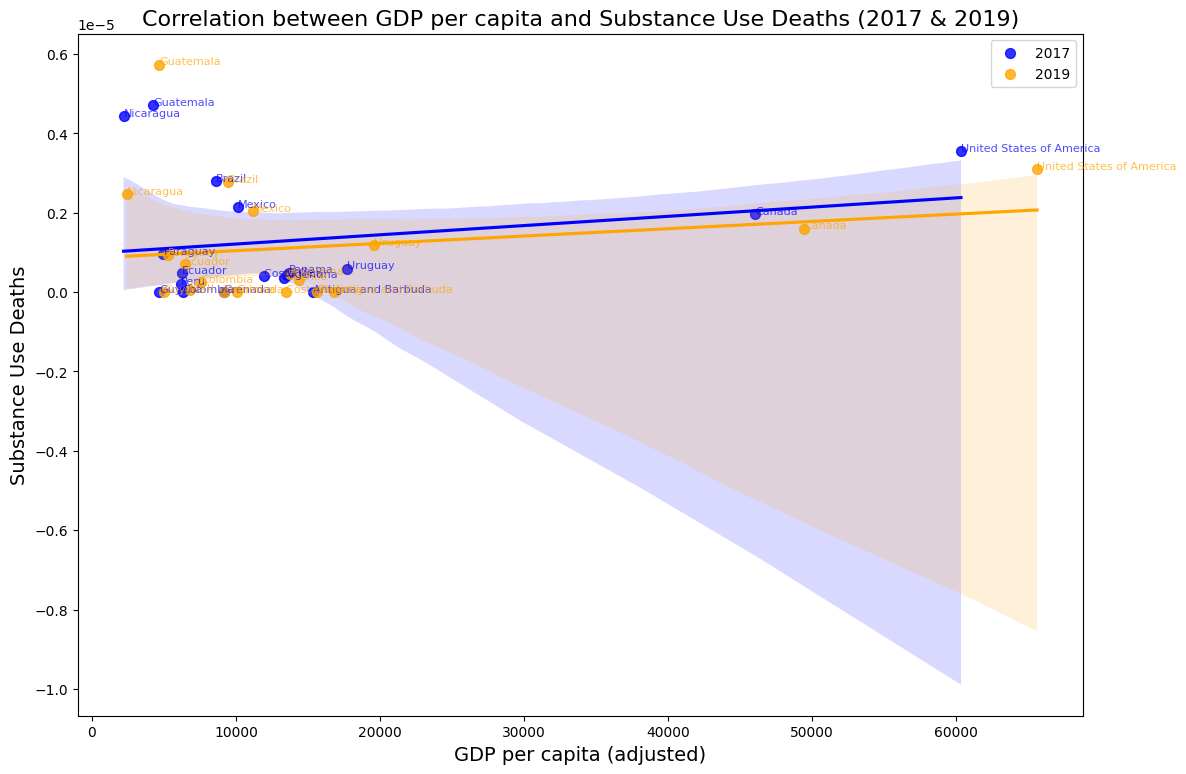

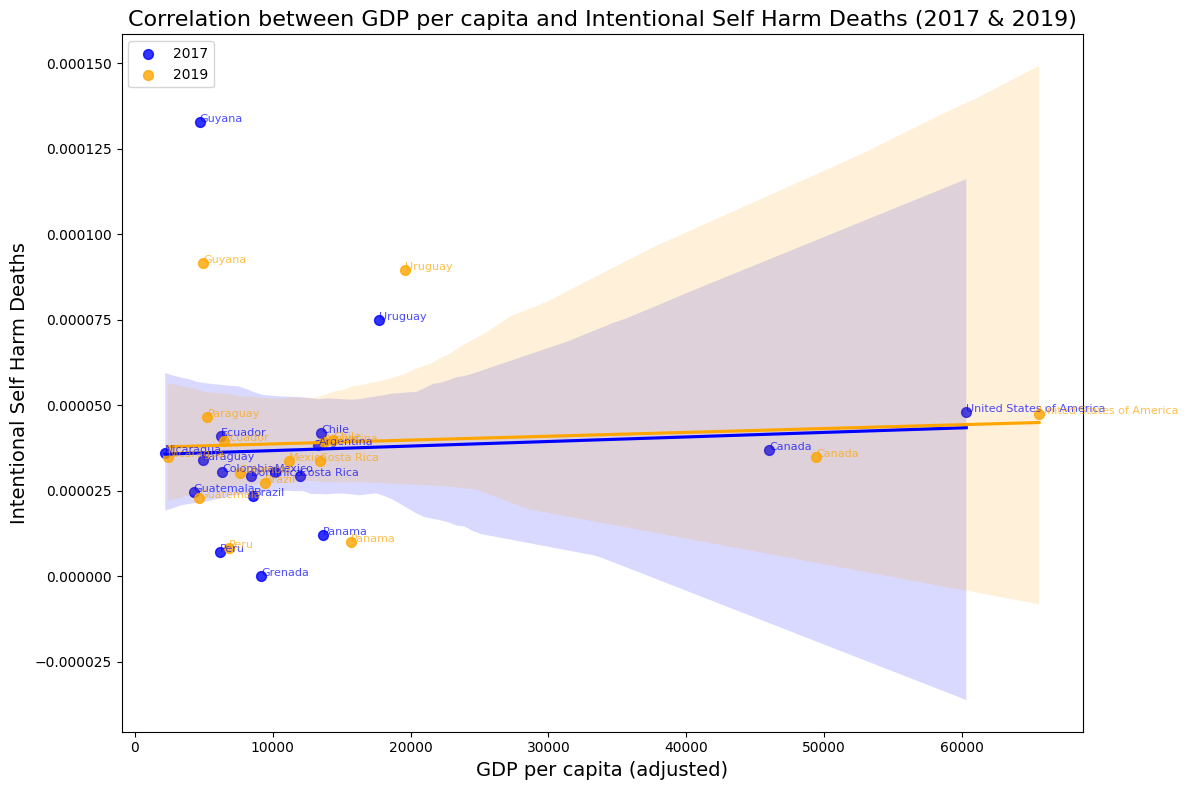

In [ ]:
# plot regression lines for 2 years
def plot_regression_two_years(df, x_col_2017, y_col_2017, x_col_2019, y_col_2019, title, xlabel, ylabel, annotate_col):
    plt.figure(figsize=(12, 8))

    # Plot for 2017
    sns.regplot(
        x=x_col_2017,
        y=y_col_2017,
        data=df,
        label='2017',
        scatter_kws={'color': 'blue', 's': 50},
        line_kws={'color': 'blue'}
    )

    # Plot for 2019
    sns.regplot(
        x=x_col_2019,
        y=y_col_2019,
        data=df,
        label='2019',
        scatter_kws={'color': 'orange', 's': 50},
        line_kws={'color': 'orange'}
    )


    for i in range(len(df)):
        plt.text(
            x=df[x_col_2017].iloc[i],
            y=df[y_col_2017].iloc[i],
            s=df[annotate_col].iloc[i],
            fontsize=8,
            alpha=0.7,
            color='blue'
        )


    for i in range(len(df)):
        plt.text(
            x=df[x_col_2019].iloc[i],
            y=df[y_col_2019].iloc[i],
            s=df[annotate_col].iloc[i],
            fontsize=8,
            alpha=0.7,
            color='orange'
        )

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()


# plot for Substance Use Deaths - both years
plot_regression_two_years(
    final_aggregated_data,
    'GDP_per_capita_2017',
    'Deaths_2017_substance_use_adjusted',
    'GDP_per_capita_2019',
    'Deaths_2019_substance_use_adjusted',
    'Correlation between GDP per capita and Substance Use Deaths (2017 & 2019)',
    'GDP per capita (adjusted)',
    'Substance Use Deaths',
    'Country'
)

# plot for Intentional Self Harm Deaths - both years
plot_regression_two_years(
    final_aggregated_data,
    'GDP_per_capita_2017',
    'Deaths_2017_intentional_self_harm_adjusted',
    'GDP_per_capita_2019',
    'Deaths_2019_intentional_self_harm_adjusted',
    'Correlation between GDP per capita and Intentional Self Harm Deaths (2017 & 2019)',
    'GDP per capita (adjusted)',
    'Intentional Self Harm Deaths',
    'Country'
)


In [ ]:
final_aggregated_data

Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
8                    Ecuador                              688.0   
9                    Grenada                                0.0   
10                 Guatemala                              408.0   
11                    Guyana                              102.0   
12                    Mexico                             3754.0   
13                 Nicaragua                              228.0   
14                    Panama                               50.0   
15                  Paraguay                              216.0   
16                      Peru                              222.0   
17  United States of America                            15630.0   
18                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
8                         8.0         16759519   
9                         0.0           115438   
10                       78.0         16567357   
11                        0.0           768479   
12                      264.0        123400057   
13                       28.0          6316231   
14                        2.0          4098707   
15                        6.0          6338660   
16                        6.0         31324637   
17                     1152.0        325122128   
18                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
8                               688.0                       12.0   
9                                 NaN                        0.0   
10                              394.0                       98.0   
11                               74.0                        0.0   
12                             4226.0                      256.0   
13                              226.0                       16.0   
14                               42.0                        0.0   
15                              304.0                        6.0   
16                              268.0                        2.0   
17                            15542.0                     1016.0   
18                              304.0                        4.0   

    Population 2019  Deaths_2017_intentional_self_harm_adjusted  \
0           91364.0                                         NaN   
1        44973465.0                                    0.000038   
2       207455459.0                                    0.000023   
3        37618495.0                               

In [ ]:
# ols regression, r2 and p-values
# 1- GDP per capita  VS  Substance use deaths (2017, 2019)
# 2 -GDP per capita VS  Intentional self harm deaths (2017,2019)

import statsmodels.api as sm

# ols regression + summary with p-values
def perform_ols_regression(df, x_col, y_col):
    # Drop rows with NaN in either the X or y columns
    clean_df = df[[x_col, y_col]].dropna()

    X = sm.add_constant(clean_df[x_col])
    y = clean_df[y_col]
    model = sm.OLS(y, X).fit()
    print(model.summary())



# OLS regression for SUD
print("OLS Regression for Substance Use Deaths (2017)")
perform_ols_regression(final_aggregated_data, 'GDP_per_capita_2017', 'Deaths_2017_substance_use_adjusted')

print("\nOLS Regression for Substance Use Deaths (2019)")
perform_ols_regression(final_aggregated_data, 'GDP_per_capita_2019', 'Deaths_2019_substance_use_adjusted')


# OLS regression for Self Harm
print("\nOLS Regression for Intentional Self Harm Deaths (2017)")
perform_ols_regression(final_aggregated_data, 'GDP_per_capita_2017', 'Deaths_2017_intentional_self_harm_adjusted')

print("\nOLS Regression for Intentional Self Harm Deaths (2019)")
perform_ols_regression(final_aggregated_data, 'GDP_per_capita_2019', 'Deaths_2019_intentional_self_harm_adjusted')


OLS Regression for Substance Use Deaths (2017)
                                    OLS Regression Results                                    
Dep. Variable:     Deaths_2017_substance_use_adjusted   R-squared:                       0.049
Model:                                            OLS   Adj. R-squared:                 -0.010
Method:                                 Least Squares   F-statistic:                    0.8291
Date:                                Wed, 18 Jun 2025   Prob (F-statistic):              0.376
Time:                                        13:56:14   Log-Likelihood:                 215.92
No. Observations:                                  18   AIC:                            -427.8
Df Residuals:                                      16   BIC:                            -426.1
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
   

In [ ]:
final_aggregated_data["GDP_per_capita_2017_adjusted"] = (final_aggregated_data["GDP_per_capita_2017"] / 1e9)
final_aggregated_data["GDP_per_capita_2019_adjusted"] = (final_aggregated_data["GDP_per_capita_2019"] / 1e9)

In [ ]:
final_aggregated_data["Deaths_2017_self_harm_per_million_copy"] = final_aggregated_data["Deaths_2017_intentional_self_harm_adjusted"]*1e5
final_aggregated_data["Deaths_2019_self_harm_per_million_copy"] = final_aggregated_data["Deaths_2019_intentional_self_harm_adjusted"]*1e5
final_aggregated_data

Country  Intentional Self Harm Deaths 2017  \
0        Antigua and Barbuda                                NaN   
1                  Argentina                             1698.0   
2                     Brazil                             4780.0   
3                     Canada                             1350.0   
4                      Chile                              776.0   
5                   Colombia                             1468.0   
6                 Costa Rica                              144.0   
7                   Dominica                                2.0   
8                    Ecuador                              688.0   
9                    Grenada                                0.0   
10                 Guatemala                              408.0   
11                    Guyana                              102.0   
12                    Mexico                             3754.0   
13                 Nicaragua                              228.0   
14                    Panama                               50.0   
15                  Paraguay                              216.0   
16                      Peru                              222.0   
17  United States of America                            15630.0   
18                   Uruguay                              254.0   

    Substance Use Deaths 2017  Population 2017  \
0                         0.0            90468   
1                        16.0         44288894   
2                       570.0        204703445   
3                        72.0         36545075   
4                         8.0         18558868   
5                         0.0         48131078   
6                         2.0          4913177   
7                         NaN            68496   
8                         8.0         16759519   
9                         0.0           115438   
10                       78.0         16567357   
11                        0.0           768479   
12                      264.0        123400057   
13                       28.0          6316231   
14                        2.0          4098707   
15                        6.0          6338660   
16                        6.0         31324637   
17                     1152.0        325122128   
18                        2.0          3388438   

    Intentional Self Harm Deaths 2019  Substance Use Deaths 2019  \
0                                 NaN                        0.0   
1                              1770.0                       20.0   
2                              5680.0                      574.0   
3                              1308.0                       60.0   
4                               764.0                        6.0   
5                              1512.0                       12.0   
6                               168.0                        0.0   
7                                 NaN                        0.0   
8                               688.0                       12.0   
9                                 NaN                        0.0   
10                              394.0                       98.0   
11                               74.0                        0.0   
12                             4226.0                      256.0   
13                              226.0                       16.0   
14                               42.0                        0.0   
15                              304.0                        6.0   
16                              268.0                        2.0   
17                            15542.0                     1016.0   
18                              304.0                        4.0   

    Population 2019  Deaths_2017_intentional_self_harm_adjusted  \
0           91364.0                                         NaN   
1        44973465.0                                    0.000038   
2       207455459.0                                    0.000023   
3        37618495.0                               

In [ ]:
pip install -U kaleido

In [ ]:
final_aggregated_data.columns

Index(['Country', 'Intentional Self Harm Deaths 2017',
       'Substance Use Deaths 2017', 'Population 2017',
       'Intentional Self Harm Deaths 2019', 'Substance Use Deaths 2019',
       'Population 2019', 'Deaths_2017_intentional_self_harm_adjusted',
       'Deaths_2017_substance_use_adjusted',
       'Deaths_2019_intentional_self_harm_adjusted',
       'Deaths_2019_substance_use_adjusted', 'GDP_per_capita_2017',
       'GDP_per_capita_2019', 'ISO_Code', 'GDP_per_capita_2017_adjusted',
       'GDP_per_capita_2019_adjusted',
       'Deaths_2017_self_harm_per_million_copy',
       'Deaths_2019_self_harm_per_million_copy'],
      dtype='object')

In [ ]:
import plotly.express as px
import plotly


geo_data = final_aggregated_data[['ISO_Code', 'Country', 'Deaths_2019_self_harm_per_million_copy']]
geo_data = geo_data.groupby(['ISO_Code', 'Country'])['Deaths_2019_self_harm_per_million_copy'].sum().reset_index()

fig = px.choropleth (
    geo_data,
    locations = "ISO_Code",
    color = "Deaths_2019_self_harm_per_million_copy",
    title = "death ISH 2019",
    color_continuous_scale = ["royalblue", 'orange'],
    range_color = (0, 15),
    projection = "natural earth"
)

fig.show()
plotly.offline.plot(fig, filename='new_map_1_201')

'new_map_1_2019.html'

In [ ]:
geo_data = final_aggregated_data[['ISO_Code', 'Country', 'GDP_per_capita_2019_adjusted']]

# Group the data (if necessary)
geo_data = geo_data.groupby(['ISO_Code', 'Country'])['GDP_per_capita_2019_adjusted'].sum().reset_index()

geo_data['GDP_per_capita_2019_USD_thousands'] = geo_data['GDP_per_capita_2019_adjusted'] * 1e6

fig = px.choropleth(
    geo_data,
    locations="ISO_Code",
    color="GDP_per_capita_2019_USD_thousands",
    hover_name="Country",
    title="GDP per capita in thousands of USD (2019)",
    color_continuous_scale="Viridis",
    projection="natural earth",
    labels={"GDP_per_capita_2019_USD_thousands": "GDP per capita (k USD)"}
)

# Show the map
fig.show()

# Save the map as an HTML file
plotly.offline.plot(fig, filename='new_map_6_2019_log_scale.html')

'new_map_6_2019_log_scale.html'